In [2]:
import pandas as pd 
import numpy as np 



import re 

import nltk                                # Python library for NLP
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

ModuleNotFoundError: No module named 'pandas'

# Let Preprocess the data 

In [34]:
df = pd.read_csv("data.csv")


In [35]:
df_json = pd.read_json('ads.json', lines=True)

In [36]:
# Let's write the code such that we collect the information from both file and join them to make the one data set
# of job ads along with applied and view and then we mark the job applied with 1 and 0 according to 75 percentile 

# Remove the urls
def remove_urls(s):
    s = re.sub('[^\s]*.com[^\s]*', "", s)
    s = re.sub('[^\s]*www.[^\s]*', "", s)
    s = re.sub('[^\s]*.co.uk[^\s]*', "", s)
    return s


df_json['clean_content'] = df_json['content'].map(remove_urls)



In [37]:
# Remove the star_words
def remove_star_words(s):
    return re.sub('[^\s]*[\*]+[^\s]*', "", s)

df_json['clean_content'] = df_json['clean_content'].map(remove_star_words)


In [38]:
# Remove \nb \nM \t
def remove_linebreak(s):
    s = re.sub('[^\s]*\n[^\s]*', "", s)
    s = re.sub('[^\s]*\nb[^\s]*', "", s)
    s = re.sub('[^\s]*\nM[^\s]*', "", s)
    return s
df_json['clean_content'] = df_json['clean_content'].map(remove_linebreak)
df_json['clean_title'] = df_json['title'].map(remove_linebreak)
df_json['clean_abstract'] = df_json['abstract'].map(remove_linebreak)


In [39]:
# Remove the html_words
def remove_html(s):
    #s = re.sub('[^\s]*<[^\s]*', "", s)
    #s = re.sub('[^\s]*>[^\s]*', "", s)
    #s = re.sub('[^\S]*<[^\S]*', "", s)
    #s = re.sub('[^\S]*>[^\S]*', "", s)
    s= re.sub('<[^>]+>', ' ', s).strip()
    return s

df_json['clean_content'] = df_json['clean_content'].map(remove_html)


In [40]:
# Remove the punctuations
from string import punctuation

def remove_punctuation(s):
    global punctuation
    for p in punctuation:
        s = s.replace(p, '')
    return s

df_json['clean_content'] = df_json['clean_content'].map(remove_punctuation)
df_json['clean_title'] = df_json['title'].map(remove_punctuation)
df_json['clean_abstract'] = df_json['abstract'].map(remove_punctuation)


In [41]:
ndfA = df.groupby(["job_id"])["kind"].apply(lambda x: x[x == 'A'].count()).reset_index().rename({'kind': 'Applied'}, axis=1)

In [42]:
ndfV = df.groupby(["job_id"])["kind"].apply(lambda x: x[x == 'V'].count()).reset_index().rename({'kind': 'View'}, axis=1)

In [43]:
re_df_json= df_json.rename({'id' :'job_id'},axis = 1 )

In [44]:
m1 = pd.merge(re_df_json , ndfA , on = 'job_id')

In [45]:
m1 = pd.merge(m1 , ndfV , on ='job_id')

In [46]:
m1 = m1.replace(r'\n',' ', regex=True) 
m1 = m1.replace(r'\ ',' ', regex=True) 


In [47]:
Applied_perc_75 = np.percentile(m1['Applied'], 75)
m1['Applied'] = np.where(m1['Applied'] >= Applied_perc_75, 1, 0)

In [48]:


m1['text'] = m1['clean_content'] + ' ' + m1['clean_abstract'] + ' ' + m1['clean_title']




In [49]:
m1.head()

,job_id,title,abstract,content,metadata,clean_content,clean_title,clean_abstract,Applied,View,text
0,38915469,Recruitment Consultant,We are looking for someone to focus purely on ...,<HTML><p>Are you looking to join a thriving bu...,{'standout': {'bullet1': 'Join a Sector that i...,Are you looking to join a thriving business th...,Recruitment Consultant,We are looking for someone to focus purely on ...,0,135,Are you looking to join a thriving business th...
1,38934839,Computers Salesperson - Coburg,Passionate about exceptional customer service?...,<HTML><p>&middot;&nbsp;&nbsp;Casual hours as r...,{'additionalSalaryText': 'Attractive Commissio...,middotnbspnbspCasual hours as required transit...,Computers Salesperson Coburg,Passionate about exceptional customer service ...,1,117,middotnbspnbspCasual hours as required transit...
2,38946054,Senior Developer | SA,Readifarians are known for discovering the lat...,<HTML><p>Readify helps organizations innovate ...,"{'standout': {'bullet1': 'Design, develop, tes...",Readify helps organizations innovate with tech...,Senior Developer SA,Readifarians are known for discovering the lat...,0,21,Readify helps organizations innovate with tech...
3,38833950,Senior Commercial Property Manager | Leading T...,~ Rare opportunity for a Senior PM to step int...,<HTML><p><strong>WayPoint Recruitment&nbsp;</s...,{'additionalSalaryText': '$140k + Car Park - C...,WayPoint Recruitmentnbsp have partnered up wit...,Senior Commercial Property Manager Leading Ti...,Rare opportunity for a Senior PM to step into...,0,99,WayPoint Recruitmentnbsp have partnered up wit...
4,38856271,Technology Manager | Travel Industry,Rare opportunity for an experienced Technology...,<HTML>This is a key role within a market leadi...,{'standout': {'bullet1': 'Lead overarching str...,This is a key role within a market leading wi...,Technology Manager Travel Industry,Rare opportunity for an experienced Technology...,0,36,This is a key role within a market leading wi...


In [50]:
apply = (m1['Applied'] == 1)

In [51]:
Applied = m1[apply]['text']

In [52]:
not_apply = (m1['Applied'] == 0)

In [53]:
Not_Applied = m1[not_apply]['text']

In [54]:
len(Applied)

13038

In [55]:
print('Number of Applied Jobs: ', len(Applied))
print('Number of not Applied jobs: ', len(Not_Applied))

print('\nThe type of Applied jobs is: ', type(Applied))
print('The type of a not Applied job is: ', type(Applied[1]))

Number of Applied Jobs:  13038
Number of not Applied jobs:  36962

The type of Applied jobs is:  <class 'pandas.core.series.Series'>
The type of a not Applied job is:  <class 'str'>


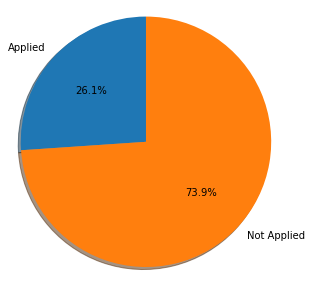

In [56]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Applied', 'Not Applied'

# Sizes for each slide
sizes = [len(Applied), len(Not_Applied)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [57]:
nltk.word_tokenize(Applied[1])

['middotnbspnbspCasual',
 'hours',
 'as',
 'required',
 'transition',
 'to',
 'Parttime',
 'or',
 'Fulltime',
 'available',
 'middotnbsp',
 'based',
 'structures',
 'middotnbsp',
 'Paths',
 'for',
 'career',
 'progression',
 'with',
 'a',
 'trusted',
 'national',
 'brand',
 'Discover',
 'a',
 'great',
 'place',
 'to',
 'work',
 'at',
 'Harvey',
 'Norman',
 'with',
 'over',
 '180',
 'stores',
 'nationwide',
 'Harvey',
 'Norman',
 'is',
 'an',
 'Australian',
 'retail',
 'icon',
 'with',
 'a',
 'strong',
 'market',
 'reputation',
 'and',
 'performance',
 'in',
 'the',
 'retail',
 'categories',
 'of',
 'furniture',
 'and',
 'bedding',
 'flooring',
 'bathrooms',
 'and',
 'kitchen',
 'renovations',
 'electrical',
 'goods',
 'small',
 'appliances',
 'technology',
 'and',
 'are',
 'seeking',
 'an',
 'enthusiastic',
 'customer',
 'service',
 'focused',
 'Salesperson',
 'to',
 'join',
 'the',
 'Coburg',
 'Salespeople',
 'have',
 'an',
 'understanding',
 'of',
 'life',
 'at',
 'home',
 'solutions

In [58]:
# store english stopwords in a list
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

def remove_stopwords(s):
    global en_stopwords
    s = nltk.word_tokenize(s)
    s = " ".join([w for w in s if w not in en_stopwords])
    return s

In [70]:

m1['text_nostop'] = m1['text'].map(remove_stopwords)

In [62]:

stemmer = nltk.PorterStemmer()


In [74]:
m1['text_nostop'][0]

'Are looking join thriving business reward hard work whilst make difference Children ’ lives The Role We looking someone focus purely recruiting Permanent staff Early Childhood Educaton Sector The role include Building relationships range existing prospective clients Identify issues help provide solution Attending client visits understanding client requirements Representing Pulse Child Care Crew ambassador career fairs external events Managing recruitment processes deliver monthly targets Developing executing candidate development strategy Coordinating resources ensure vacancies properly worked The Benefits Competitive salary structure uncapped earning potential Have experience successes recognised key player business Everyone heard encouraged offer opinions Regular Incentives including allexpenses trips team building days Financial rewards celebratory meals eligible Day 1 We Quarterly Lunch Clubs allexpenses paid Friday afternoon posh restaurant Be part socially active supportive team

In [75]:
m1['token_text'] = m1['text_nostop'].map(nltk.word_tokenize)

['Are',
 'looking',
 'join',
 'thriving',
 'business',
 'reward',
 'hard',
 'work',
 'whilst',
 'make',
 'difference',
 'Children',
 '’',
 'lives',
 'The',
 'Role',
 'We',
 'looking',
 'someone',
 'focus',
 'purely',
 'recruiting',
 'Permanent',
 'staff',
 'Early',
 'Childhood',
 'Educaton',
 'Sector',
 'The',
 'role',
 'include',
 'Building',
 'relationships',
 'range',
 'existing',
 'prospective',
 'clients',
 'Identify',
 'issues',
 'help',
 'provide',
 'solution',
 'Attending',
 'client',
 'visits',
 'understanding',
 'client',
 'requirements',
 'Representing',
 'Pulse',
 'Child',
 'Care',
 'Crew',
 'ambassador',
 'career',
 'fairs',
 'external',
 'events',
 'Managing',
 'recruitment',
 'processes',
 'deliver',
 'monthly',
 'targets',
 'Developing',
 'executing',
 'candidate',
 'development',
 'strategy',
 'Coordinating',
 'resources',
 'ensure',
 'vacancies',
 'properly',
 'worked',
 'The',
 'Benefits',
 'Competitive',
 'salary',
 'structure',
 'uncapped',
 'earning',
 'potential'

In [78]:
m1['stemmed'] = m1['token_text'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

['are',
 'look',
 'join',
 'thrive',
 'busi',
 'reward',
 'hard',
 'work',
 'whilst',
 'make',
 'differ',
 'children',
 '’',
 'live',
 'the',
 'role',
 'we',
 'look',
 'someon',
 'focu',
 'pure',
 'recruit',
 'perman',
 'staff',
 'earli',
 'childhood',
 'educaton',
 'sector',
 'the',
 'role',
 'includ',
 'build',
 'relationship',
 'rang',
 'exist',
 'prospect',
 'client',
 'identifi',
 'issu',
 'help',
 'provid',
 'solut',
 'attend',
 'client',
 'visit',
 'understand',
 'client',
 'requir',
 'repres',
 'puls',
 'child',
 'care',
 'crew',
 'ambassador',
 'career',
 'fair',
 'extern',
 'event',
 'manag',
 'recruit',
 'process',
 'deliv',
 'monthli',
 'target',
 'develop',
 'execut',
 'candid',
 'develop',
 'strategi',
 'coordin',
 'resourc',
 'ensur',
 'vacanc',
 'properli',
 'work',
 'the',
 'benefit',
 'competit',
 'salari',
 'structur',
 'uncap',
 'earn',
 'potenti',
 'have',
 'experi',
 'success',
 'recognis',
 'key',
 'player',
 'busi',
 'everyon',
 'heard',
 'encourag',
 'offer',
 

In [81]:
stem_Applied = m1[apply]['stemmed']

In [82]:
stem_Not_Applied = m1[not_apply]['stemmed']

1        [middotnbspnbspcasu, hour, requir, transit, pa...
5        [program, skill, workforc, current, seek, expe...
7        [​​​be, part, excit, startup, innov, outreach,...
18       [fraser, properti, australia, one, australia, ...
25       [recruit, across, busi, support, profession, a...
                               ...                        
49976    [tangalooma, island, resort, locat, moreton, i...
49978    [bullnbsp, carpentri, sutherland, shire, diffe...
49982    [our, client, leader, automot, industri, look,...
49983    [the, opportun, are, motiv, earli, career, sci...
49992    [about, wellestablish, leader, field, speciali...
Name: stemmed, Length: 13038, dtype: object

In [84]:
labels = np.append(np.ones((len(stem_Applied))), np.zeros((len(stem_Not_Applied))))

In [95]:
jobs = stem_Applied.tolist() + stem_Not_Applied.tolist()

In [90]:
def build_freqs(jobs, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, job in zip(yslist, jobs):
        for word in job:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs

In [96]:
freqs = build_freqs(jobs, labels)

In [106]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti', 'australia',
        'song', 'idea', 'power', 'play', 'magnific', 'shire', 'carpentri' , 'opportun']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happi', 421, 1231],
 ['merri', 0, 5],
 ['nice', 58, 148],
 ['good', 2884, 8161],
 ['bad', 12, 39],
 ['sad', 2, 4],
 ['mad', 4, 8],
 ['best', 3405, 9749],
 ['pretti', 34, 79],
 ['australia', 6143, 17317],
 ['song', 1, 5],
 ['idea', 684, 1865],
 ['power', 756, 1935],
 ['play', 917, 2526],
 ['magnific', 9, 28],
 ['shire', 122, 305],
 ['carpentri', 91, 310],
 ['opportun', 18200, 51559]]

In [114]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_Applied = stem_Applied.tolist()[:3000]
train_Applied = stem_Applied.tolist()[3000:]
test_Not_Applied = stem_Not_Applied.tolist()[:7000]
train_Not_Applied = stem_Not_Applied.tolist()[7000:]

train_x = train_Applied + train_Not_Applied 
test_x = test_Applied + test_Not_Applied

In [115]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_Applied), 1)), np.zeros((len(train_Not_Applied), 1)), axis=0)
test_y = np.append(np.ones((len(test_Applied), 1)), np.zeros((len(test_Not_Applied), 1)), axis=0)

In [116]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (40000, 1)
test_y.shape = (10000, 1)


In [117]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 164242


## Let's implement logistic regression model from scratch

In [118]:
def sigmoid(z): 
  
    h = 1/(1+ np.exp(-z))
   
    
    return h

In [121]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE ###
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # get the sigmoid of z
        h = sigmoid(z)       

        
        # calculate the cost function
        J = -1/m * (np.dot(np.transpose(y), np.log(h))+ np.dot(np.transpose(1-y),np.log(1-h)))
            
            
            
        # update the weights theta
        theta = theta - alpha/m *(np.dot(np.transpose(x), (h-y)))
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta

In [123]:
def extract_features(job, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = job
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word,1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word,0.0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [124]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    
    ### END CODE HERE ###
    
    return y_pred

In [125]:
def test_logistic_regression(test_x, test_y, freqs, theta, predict_tweet=predict_tweet):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    ### START CODE HERE ###
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1.0)
        else:
            # append 0 to the list
            y_hat.append(0.0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = (y_hat == np.squeeze(test_y)).sum()/len(test_x)

    ### END CODE HERE ###
    
    return accuracy

## Test our model

In [126]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


In [127]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

/var/folders/ms/rmm4vvcd0yq1_brp9fh1xrbr0000gp/T/ipykernel_12159/3722933222.py:3: RuntimeWarning: overflow encountered in exp
  h = 1/(1+ np.exp(-z))
/var/folders/ms/rmm4vvcd0yq1_brp9fh1xrbr0000gp/T/ipykernel_12159/1150698670.py:28: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (np.dot(np.transpose(y), np.log(h))+ np.dot(np.transpose(1-y),np.log(1-h)))


The cost after training is nan.
The resulting vector of weights is [0.0, -0.00053175, -0.00213828]


In [128]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

/var/folders/ms/rmm4vvcd0yq1_brp9fh1xrbr0000gp/T/ipykernel_12159/3722933222.py:3: RuntimeWarning: overflow encountered in exp
  h = 1/(1+ np.exp(-z))


Logistic regression model's accuracy = 0.7000
